### <h3 style="background-color:#6c757d;color:Red;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Technology For All Hackathon Task </centre></strong></h3>

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>  Importing Libraries & Packages </centre></strong></h3>

In [82]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Modelling Helpers :
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.impute import SimpleImputer

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset </centre></strong></h3>

In [83]:
# Importing the data

data = pd.read_csv('train.csv')

data.head()

,-48.3666687,49,1
0,-28.764718,32.895035,1
1,-57.652411,30.937698,1
2,-60.491484,59.372470,1
3,-39.366669,53.000000,1
4,-51.430453,71.764228,1


- As we are able to see that the data was not having the column names. So , I choose 'x' , 'y' & 'Target' as column names

In [84]:
data.loc[len(data.index)] = [-48.3666687, 49, 1] 

In [85]:
data.columns= ['x','y','Target']
data

,x,y,Target
0,-28.764718,32.895035,1.0
1,-57.652411,30.937698,1.0
2,-60.491484,59.372470,1.0
3,-39.366669,53.000000,1.0
4,-51.430453,71.764228,1.0
...,...,...,...
1032,90.633331,-82.000000,0.0
1033,93.732641,-99.824137,0.0
1034,76.703768,-79.187814,0.0
1035,96.095853,-91.345752,0.0


In [86]:
# Shape of the data

data.shape

(1037, 3)

In [87]:
# Statistcal information of the dataset

data.describe()

,x,y,Target
count,1037.000000,1037.000000,1037.000000
mean,-0.885901,7.191127,0.277724
std,74.676285,69.394914,0.448093
min,-134.736012,-134.645577,0.000000
25%,-62.215213,-43.120847,0.000000
50%,0.449238,15.000000,0.000000
75%,60.816617,57.000000,1.000000
max,133.602619,134.612405,1.000000


In [88]:
data.loc[(data['x']<=0) | (data['y']<=0)]

,x,y,Target
0,-28.764718,32.895035,1.0
1,-57.652411,30.937698,1.0
2,-60.491484,59.372470,1.0
3,-39.366669,53.000000,1.0
4,-51.430453,71.764228,1.0
...,...,...,...
1032,90.633331,-82.000000,0.0
1033,93.732641,-99.824137,0.0
1034,76.703768,-79.187814,0.0
1035,96.095853,-91.345752,0.0


In [89]:
data.loc[(data['x']==0) | (data['y']==0)]

,x,y,Target
199,39.633331,0.0,1.0


In [90]:
len(data.loc[(data['x']<=0) | (data['y']<=0)])

733

In [91]:
# Summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1036
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1037 non-null   float64
 1   y       1037 non-null   float64
 2   Target  1037 non-null   float64
dtypes: float64(3)
memory usage: 32.4 KB


In [92]:
# Checking for null values

data.isnull().sum()

x         0
y         0
Target    0
dtype: int64

<AxesSubplot:>

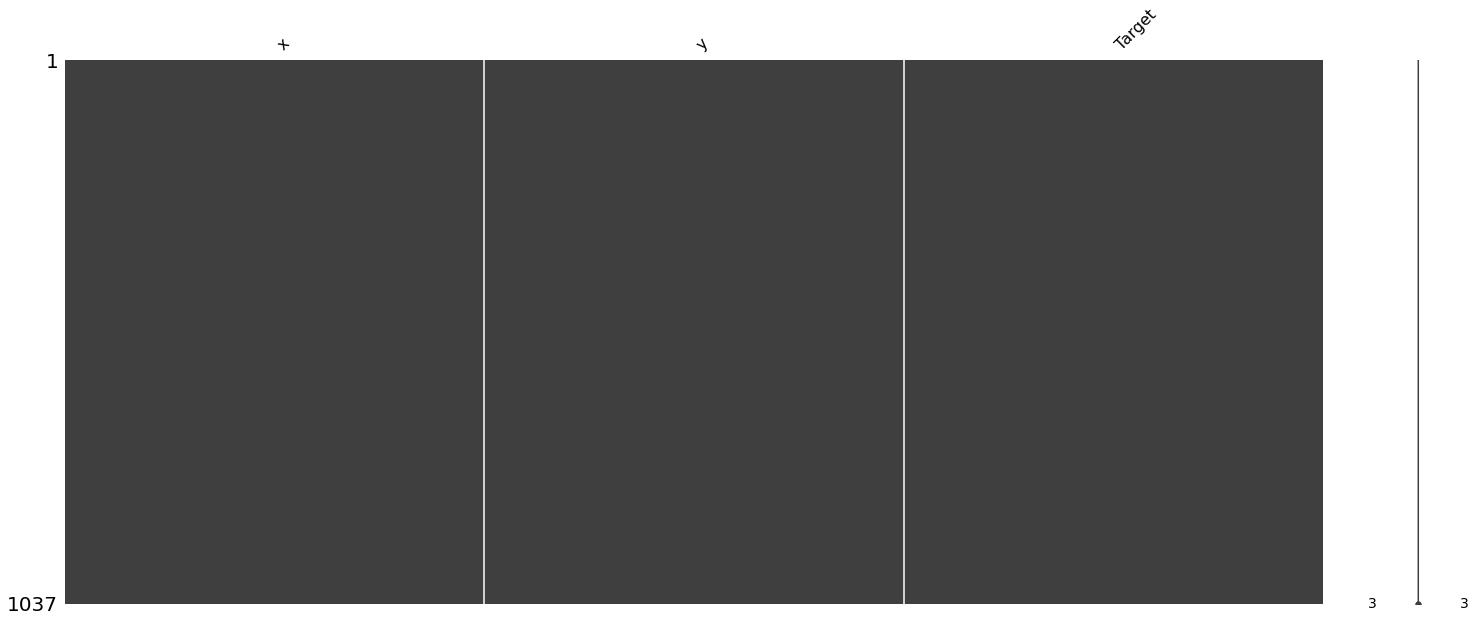

In [93]:
# Visualizing the missing values 

msno.matrix(data)

In [94]:
data.duplicated().sum()

5

In [95]:
# Oh! There were some need to drop them

data.drop_duplicates(inplace=True)

In [96]:
# Checking for confirmation

data.duplicated().sum()

0

In [97]:
# Viewing the columns

data.columns

Index(['x', 'y', 'Target'], dtype='object')

In [98]:
# Checking for Unique values in each column

print ("Unique values are:\n",data.nunique())

Unique values are:
 x         932
y         922
Target      2
dtype: int64


In [99]:
data.Target.value_counts()

0.0    747
1.0    285
Name: Target, dtype: int64

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Exploratory Data Analysis </centre></strong></h3>

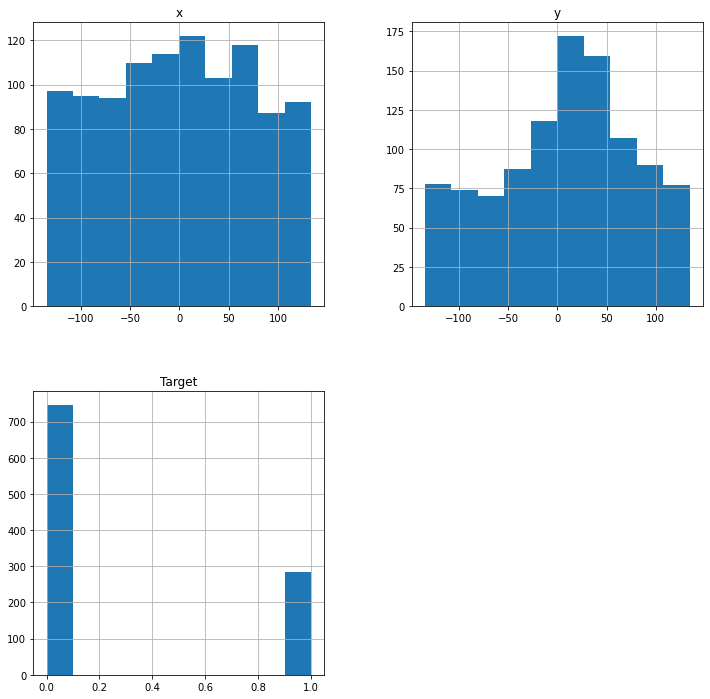

In [100]:
# Histograms

features = ['x','y','Target']
data[features].hist(figsize=(12,12))
plt.show()

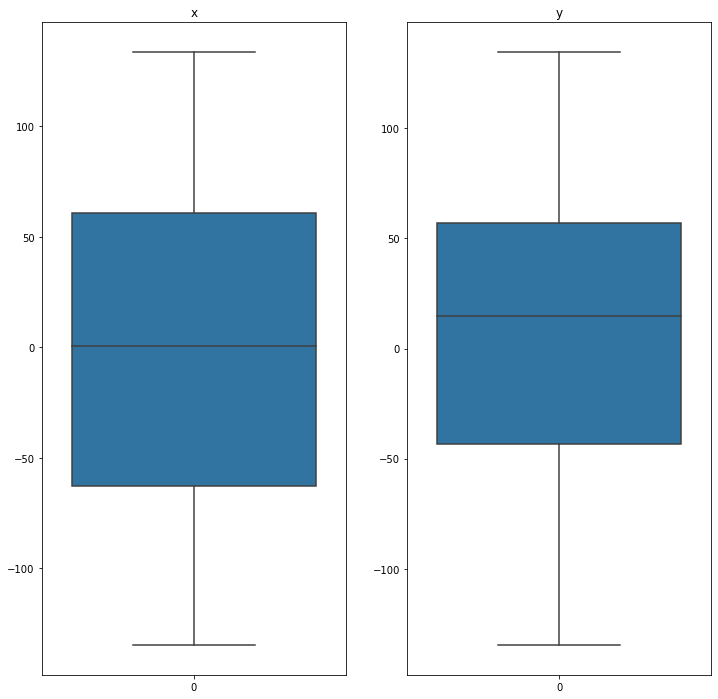

In [101]:
# Boxplot - To check for outliers

fig = plt.figure(figsize=(12,12))

plt.subplot(121)
plt.title("x")
sns.boxplot(data= data['x']);
plt.subplot(122)
plt.title("y")
sns.boxplot(data=data["y"]);

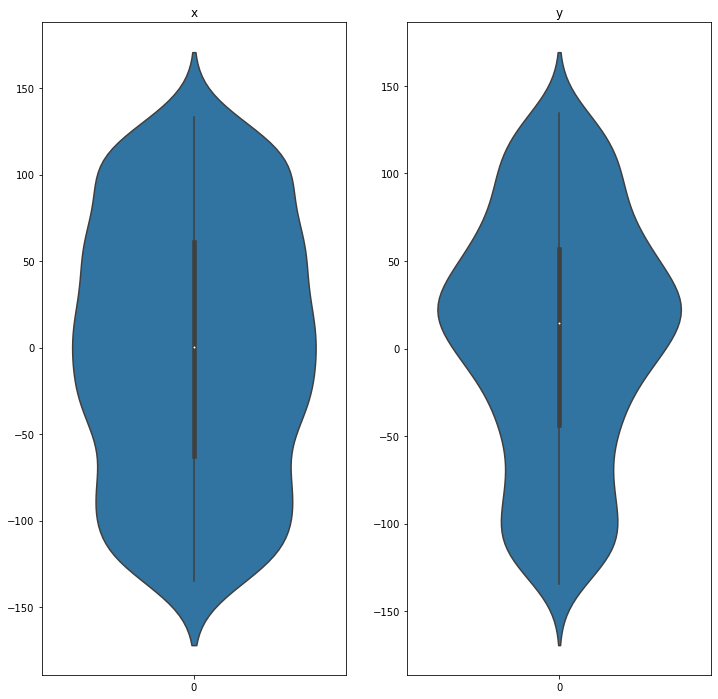

In [102]:
# Violin Plot

fig = plt.figure(figsize=(12,12))

plt.subplot(121)
plt.title("x")
sns.violinplot(data= data['x']);
plt.subplot(122)
plt.title("y")
sns.violinplot(data=data["y"]);

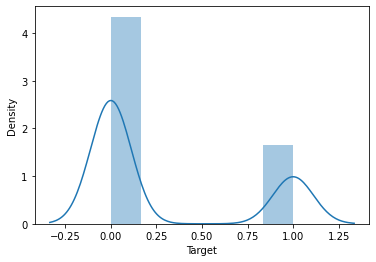

In [103]:
# Target Variable

sns.distplot(data.Target);

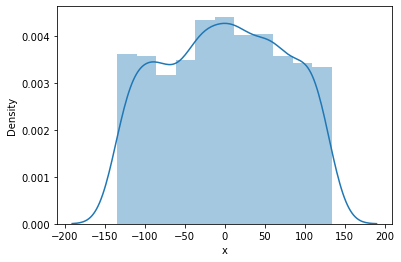

In [104]:
sns.distplot(data.x)
plt.show()

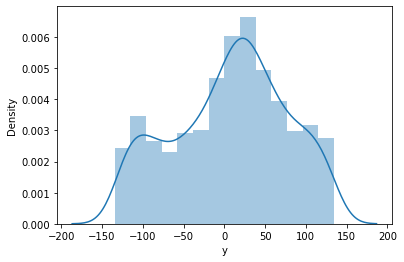

In [105]:
sns.distplot(data.y)
plt.show()

In [106]:
# Correlation Matrix

corr_matrix = data.corr()
corr_matrix

,x,y,Target
x,1.000000,-0.002976,-0.003137
y,-0.002976,1.000000,0.039529
Target,-0.003137,0.039529,1.000000


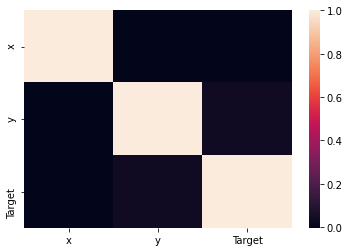

In [107]:
# Heatmap

sns.heatmap(corr_matrix)
plt.show()

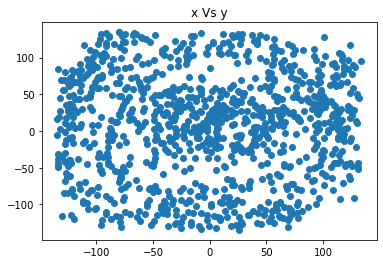

In [108]:
plt.scatter(data['x'], data['y']);
plt.title("x Vs y")
plt.show()

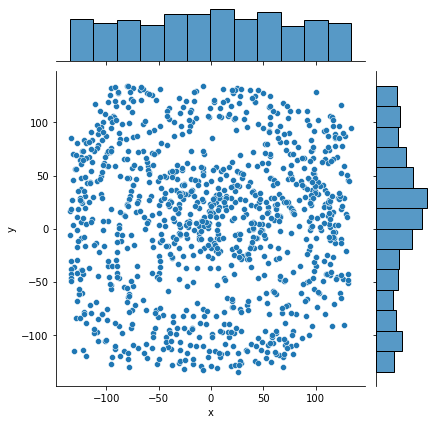

In [109]:
sns.jointplot(x='x', y='y', data=data, kind ='scatter')
plt.show()

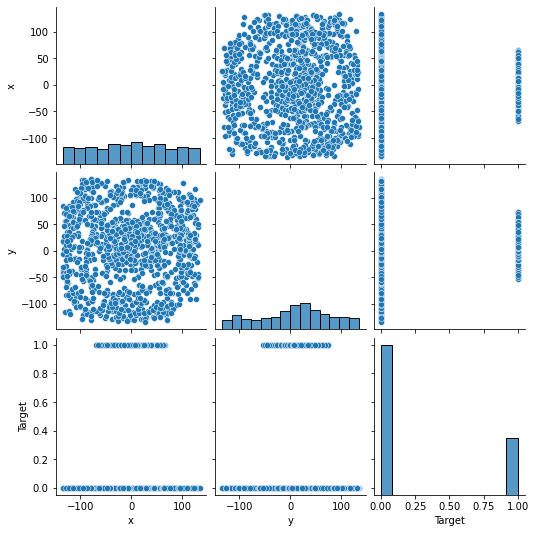

In [110]:
sns.pairplot(data)
plt.show()

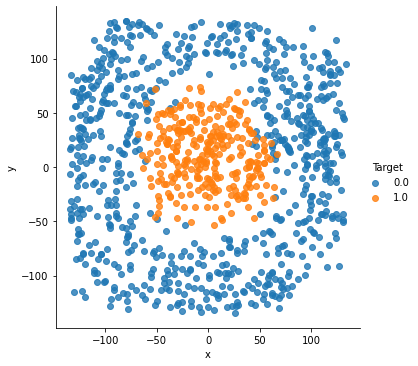

In [111]:
sns.lmplot('x', 'y', data = data,hue='Target',fit_reg=False);

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre> Model Building & Hyperparamter Tuning </centre></strong></h3>

In [112]:
# Split the data into train and test

X = data.drop(['Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=21)

In [113]:
# Standard Scaler:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
# Logistic regression:

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

clf_lr.fit(X_train, y_train)

# Prediction on Test Dataset

y_pred_lr = clf_lr.predict(X_test)

y_pred_lr

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_lr)

0.7286821705426356

In [115]:
# Hyperparameter Tuning

logModel = LogisticRegression()

penalty = ['l1','l2']

C = np.logspace(-4,4,20)

hyperparameters = dict(penalty=penalty, C=C)

clf = GridSearchCV(logModel, hyperparameters, cv=5, verbose=True,n_jobs=-1)

new_clf = clf.fit(X_train,y_train)

print(new_clf.best_estimator_.get_params()['penalty'])

print(new_clf.best_estimator_.get_params()['C'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
l2
0.0001


In [116]:
# Building the model using the hyperparameters and getting the accuracy

from sklearn.metrics import classification_report
lr = LogisticRegression(penalty='l2',C = 0.0001)

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       188
         1.0       0.00      0.00      0.00        70

    accuracy                           0.73       258
   macro avg       0.36      0.50      0.42       258
weighted avg       0.53      0.73      0.61       258



**No change in the accuracies of Logistic Regression Model even after hyperparamter tuning**

- Before Tuning : 0.72

- After Tuning : 0.73

In [117]:
# KNeighbors Classifier: 

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()

clf_knn.fit(X_train , y_train)

# Prediction on Test Dataset

y_pred_Knn = clf_knn.predict(X_test)

y_pred_Knn

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_lr)

0.7286821705426356

In [118]:
# HyperParameter Tuning

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = [{'n_neighbors':[1,3,5,7,11,13,15],'p':[1,2,3,4,5]}]

clf = GridSearchCV(KNeighborsClassifier(),tuned_parameters,scoring='accuracy')

clf.fit(X_train,y_train)

print("Best Parameters set found on the train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test,y_test))

Best Parameters set found on the train set:
{'n_neighbors': 11, 'p': 1}
KNeighborsClassifier(n_neighbors=11, p=1)

0.9728682170542635


**There was a huge change after the hyperparameter tuning with in KNN Algorithm.**

- Before Tuning : 0.72

- After Tuning : 0.97

In [119]:
# SVM & Hyperparameter tuning with basic implemenation of model.

# Classifier - Default Kernel - RBF 

clf_svc=SVC() 

# Fitting the classifier by train set

clf_svc.fit(X_train,y_train)


# Make predictions on test set

y_pred=clf_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9767


In [120]:
# Classifier with rbf kernel and C=100 

clf_svc1=SVC(C=100.0,gamma='auto') 


# Fit classifier to training set

clf_svc1.fit(X_train,y_train)


# Make predictions on test set

y_pred = clf_svc1.predict(X_test)


# Compute and print accuracy score

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9729


In [121]:
# Classifier with rbf kernel and C=1000

clf_svc2 = SVC(C=1000.0) 


# Fit classifier to training set
clf_svc2.fit(X_train,y_train)


# Make predictions on test set
y_pred=clf_svc2.predict(X_test)


# Compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9690


**A slight change in accuracies in RBF Kernal of SVC**

- SVC (Kernal - RBF, c = 1.0, gamma ='scale') : 0.97

- SVC (Kernal - RBF, c = 100.0, gamma ='auto') : 0.97

- SVC (Kernal - RBF, c = 1000.0) : 0.96

In [122]:
# Classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# Fit classifier to training set
linear_svc.fit(X_train,y_train)


# Make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7287


In [123]:
# Classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# Fit classifier to training set
linear_svc100.fit(X_train, y_train)


# Make predictions on test set
y_pred=linear_svc100.predict(X_test)


# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7287


In [124]:
# Classifier with linear kernel and C=1000.0

linear_svc1000=SVC(kernel='linear', C=1000.0) 


# Fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# Make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.7287


**No change in accuracies in Linear Kernal of SVC**

- SVC (Kernal - Linear, c = 1.0) : 0.72

- SVC (Kernal - Linear, c = 100.0) : 0.72

- SVC (Kernal - Linear, c = 1000.0) = 0.72

In [125]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()

clf_dt.fit(X_train, y_train)

# Prediction

y_pred_dt = clf_dt.predict(X_test)
y_pred_dt

# Evaluation of the model 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.98


In [126]:
# Hyper Parameter Tuning 

from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(max_depth=3,min_samples_split=20).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(DT_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(DT_clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.91


**A slight change in the accuracies after hyperparameter tuning**

- Before Tuning : 0.97

- After Tuning : 0.91

### Logistic Regression :

**No change in the accuracies of Logistic Regression Model even after hyperparamter tuning**

- Before Tuning : 0.72

- After Tuning : 0.73

### KNN Classifier:

**There was a huge change after the hyperparameter tuning with in KNN Algorithm.**

- Before Tuning : 0.72

- After Tuning : 0.97

### SVC :

**A slight change in accuracies in RBF Kernal of SVC**

- SVC (Kernal - RBF, c = 1.0, gamma ='scale') : 0.97

- SVC (Kernal - RBF, c = 100.0, gamma ='auto') : 0.97

- SVC (Kernal - RBF, c = 1000.0) : 0.96

**No change in accuracies in Linear Kernal of SVC**

- SVC (Kernal - Linear, c = 1.0) : 0.72

- SVC (Kernal - Linear, c = 100.0) : 0.72

- SVC (Kernal - Linear, c = 1000.0) = 0.72

### Decision Tree Classifier :

**A slight change in the accuracies after hyperparameter tuning**

- Before Tuning : 0.97

- After Tuning : 0.91

## Decision Tree Classifier beats the rest algorithms with its accuracy